# Data Cleaning + EDA 

**Dataset Analysis Description**

In this analysis, a comprehensive examination was conducted on the company's dataset. 

The process involved the following steps:

- **Data Cleaning:** The dataset was meticulously cleaned to ensure accuracy and reliability. This included handling missing values, removing duplicates, and correcting any inconsistencies.
- **Exploratory Data Analysis (EDA):** A detailed EDA was performed to uncover patterns, trends, and insights. 
    
    This involved:

    - Calculating descriptive statistics to understand the central tendencies and dispersion.
    - Visualizing data to identify patterns and outliers.
    - Conducting correlation analysis to identify relationships between variables.

In [453]:
#Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore') 

In [156]:
#Loading Datasets
customers = pd.read_csv('Customers.csv')
sales = pd.read_csv('Sales.csv')

## Data Cleaning on Customers Dataset

In [3]:
customers.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [157]:
customers.shape

(793, 9)

In [158]:
customers.isna().sum()

Customer ID      0
Customer Name    0
Segment          0
Age              0
Country          0
City             0
State            0
Postal Code      0
Region           0
dtype: int64

In [159]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    793 non-null    object
 1   Customer Name  793 non-null    object
 2   Segment        793 non-null    object
 3   Age            793 non-null    int64 
 4   Country        793 non-null    object
 5   City           793 non-null    object
 6   State          793 non-null    object
 7   Postal Code    793 non-null    int64 
 8   Region         793 non-null    object
dtypes: int64(2), object(7)
memory usage: 55.9+ KB


In [161]:
# Split the name: Name and Surname
customers[['name', 'surname']] = customers['Customer Name'].str.split(' ', n= 1, expand = True)

In [162]:
customers.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region,name,surname
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South,Claire,Gute
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West,Darrin,Van Huff
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South,Sean,O'Donnell
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West,Brosina,Hoffman
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South,Andrew,Allen


In [163]:
# Rename columns, from Name to First_Name, from surname to Last_Name, and from Postal Code to Postal_Code. 
customers.rename(columns = {'name' : 'First_Name', 'surname' : 'Last_Name', 'Postal Code' : 'Postal_Code'}, inplace = True)
customers.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal_Code,Region,First_Name,Last_Name
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South,Claire,Gute
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West,Darrin,Van Huff
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South,Sean,O'Donnell
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West,Brosina,Hoffman
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South,Andrew,Allen


In [164]:
# Create a new column called 'AgeGroup' and for each value in the 'Age' column, group them according to this schema:
# gen_z = age from 18-24
# millennials = age from 25-40
# gen_x = age from 41-56
# boomers = age from 57-70

# create a list of our conditions
conditions = [
    (customers['Age'] <= 24),
    (customers['Age'] > 24) & (customers['Age'] <= 40),
    (customers['Age'] > 40) & (customers['Age'] <= 56),
    (customers['Age'] > 56) & (customers['Age'] <= 70)
]

# create a list of the values we want to assign for each condition
values = ['gen_z', 'millennials', 'gen_x', 'boomers']

# create a new column and use np.select to assign values to it using our lists as arguments
customers['Age_groups'] = np.select(conditions, values)

customers.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South,Claire,Gute,boomers
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West,Darrin,Van Huff,millennials
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South,Sean,O'Donnell,boomers
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West,Brosina,Hoffman,gen_z
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South,Andrew,Allen,gen_x


In [165]:
# Let's remove some useless columns
drop_cols = ['Customer Name', 'Country', 'Age']

customers.drop(columns = drop_cols, inplace = True)
customers.head()

,Customer ID,Segment,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups
0,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers
1,DV-13045,Corporate,Los Angeles,California,90036,West,Darrin,Van Huff,millennials
2,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,Sean,O'Donnell,boomers
3,BH-11710,Consumer,Los Angeles,California,90032,West,Brosina,Hoffman,gen_z
4,AA-10480,Consumer,Concord,North Carolina,28027,South,Andrew,Allen,gen_x


In [166]:
# Let's see the data type, and perform some conversions if needed.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  793 non-null    object
 1   Segment      793 non-null    object
 2   City         793 non-null    object
 3   State        793 non-null    object
 4   Postal_Code  793 non-null    int64 
 5   Region       793 non-null    object
 6   First_Name   793 non-null    object
 7   Last_Name    792 non-null    object
 8   Age_groups   793 non-null    object
dtypes: int64(1), object(8)
memory usage: 55.9+ KB


In [167]:
# Only the postal code seems to be changed.
customers['Postal_Code'] = customers['Postal_Code'].astype(str)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  793 non-null    object
 1   Segment      793 non-null    object
 2   City         793 non-null    object
 3   State        793 non-null    object
 4   Postal_Code  793 non-null    object
 5   Region       793 non-null    object
 6   First_Name   793 non-null    object
 7   Last_Name    792 non-null    object
 8   Age_groups   793 non-null    object
dtypes: object(9)
memory usage: 55.9+ KB


## Data Cleaning on Sales DataSet

In [168]:
# Now let's check the Sales DataFrame
sales.head()

,OrderLine,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,USD261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,USD731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,USD14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,USD957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,USD22.37,2,0.20,2.52


In [169]:
# Edit the 'Sales' column, removing the 'USD'.
sales['Sales'] = sales['Sales'].str.replace('USD', '')
sales.head()

,OrderLine,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,22.37,2,0.20,2.52


In [170]:
# From 'Order Date' column, create a new column with the name of the corresponding month.
sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderLine    9994 non-null   int64  
 1   OrderID      9994 non-null   object 
 2   OrderDate    9994 non-null   object 
 3   ShipDate     9994 non-null   object 
 4   ShipMode     9994 non-null   object 
 5   CustomerID   9994 non-null   object 
 6   ProductID    9994 non-null   object 
 7   Category     9994 non-null   object 
 8   SubCategory  9994 non-null   object 
 9   Sales        9994 non-null   object 
 10  Quantity     9994 non-null   int64  
 11  Discount     9994 non-null   float64
 12  Profit       9994 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.1+ KB


In [171]:
# We have to convert 'Order Date' into a datetime type.
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

In [172]:
# Now we can create a new column and extract the month.
sales['Month'] = sales['OrderDate'].dt.strftime('%B')
sales.head()

,OrderLine,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.00,41.91,November
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.00,219.58,November
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,14.62,2,0.00,6.87,June
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,957.58,5,0.45,-383.03,October
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,22.37,2,0.20,2.52,October


In [173]:
# Extract the quarter from the 'OrderDate', by creating a new column.
sales['Quarter'] = sales['OrderDate'].dt.quarter
sales.head()

,OrderLine,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit,Month,Quarter
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.00,41.91,November,4
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.00,219.58,November,4
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,14.62,2,0.00,6.87,June,2
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,957.58,5,0.45,-383.03,October,4
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,22.37,2,0.20,2.52,October,4


## Merge the two DataFrames into a single one

In [174]:
# Let's see the columns of the two dataframes
print('customers dataframe: ', customers.columns)
print('sales dataframe: ', sales.columns)

customers dataframe:  Index(['Customer ID', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'First_Name', 'Last_Name', 'Age_groups'],
      dtype='object')
sales dataframe:  Index(['OrderLine', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID', 'ProductID', 'Category', 'SubCategory', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Month', 'Quarter'],
      dtype='object')


In [175]:
# In order to merge these two dataframes we need a shared column, in this case: CustomerID.
customers.rename(columns = {'Customer ID' : 'CustomerID'}, inplace = True)
customers.columns

Index(['CustomerID', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'First_Name', 'Last_Name', 'Age_groups'],
      dtype='object')

In [176]:
# Now we can merge these two DataFrames

df = pd.merge(customers, sales, on='CustomerID', how='inner')
df

,CustomerID,Segment,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups,OrderLine,...,ShipMode,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit,Month,Quarter
0,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,1,...,Second Class,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.0,41.91,November,4
1,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,2,...,Second Class,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.0,219.58,November,4
2,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,5492,...,First Class,OFF-ST-10000615,Office Supplies,Storage,18.16,2,0.2,1.82,January,1
3,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6878,...,Same Day,FUR-FU-10004952,Furniture,Furnishings,131.38,6,0.6,-95.25,October,4
4,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6879,...,Same Day,OFF-PA-10003001,Office Supplies,Paper,5.34,1,0.2,1.87,October,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9560,...,First Class,OFF-ST-10002554,Office Supplies,Storage,195.64,5,0.2,-44.02,May,2
9990,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9561,...,First Class,FUR-FU-10001876,Furniture,Furnishings,51.97,2,0.2,10.39,May,2
9991,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9562,...,First Class,TEC-AC-10002637,Technology,Accessories,431.98,3,0.2,-75.60,May,2
9992,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9563,...,First Class,TEC-MA-10003589,Technology,Machines,224.94,3,0.7,-164.95,May,2


In [177]:
# Let's see if there are null values

df.isna().sum()

CustomerID     0
Segment        0
City           0
State          0
Postal_Code    0
Region         0
First_Name     0
Last_Name      8
Age_groups     0
OrderLine      0
OrderID        0
OrderDate      0
ShipDate       0
ShipMode       0
ProductID      0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
Month          0
Quarter        0
dtype: int64

In [178]:
# I's seems we have null values, let's explore more in detail.
df[df['Last_Name'].isna()]

,CustomerID,Segment,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups,OrderLine,...,ShipMode,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit,Month,Quarter
6517,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,1490,...,Standard Class,OFF-LA-10000452,Office Supplies,Labels,5.04,2,0.2,1.76,November,4
6518,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,1901,...,Second Class,OFF-ST-10000563,Office Supplies,Storage,191.88,6,0.0,19.19,June,2
6519,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,2967,...,Standard Class,FUR-FU-10001473,Furniture,Furnishings,32.95,6,0.6,-19.77,December,4
6520,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,2968,...,Standard Class,OFF-ST-10002562,Office Supplies,Storage,30.02,4,0.2,3.00,December,4
6521,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,4644,...,Standard Class,OFF-BI-10002003,Office Supplies,Binders,6.37,2,0.2,2.15,August,3
6522,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,4645,...,Standard Class,TEC-MA-10001972,Technology,Machines,558.4,2,0.2,41.88,August,3
6523,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,8146,...,Standard Class,OFF-AP-10001005,Office Supplies,Appliances,471.9,6,0.0,155.73,June,2
6524,Co-12640,Consumer,Philadelphia,Pennsylvania,19143,East,Corey-Lock,None,gen_x,8147,...,Standard Class,OFF-AR-10003469,Office Supplies,Art,3.52,2,0.0,1.69,June,2


In [179]:
# Probably during our split, there was a customer name and surname divided by '-'. We can easily fix this problem.

df['Last_Name'] = df['Last_Name'].fillna('Lock') #Lock was the surname of the customer
df['First_name'] = df['First_Name'].replace('Corey-Lock', 'Corey') #Corey is the name

In [180]:
# Let's check if we fixed the problem.
df.isna().sum()

CustomerID     0
Segment        0
City           0
State          0
Postal_Code    0
Region         0
First_Name     0
Last_Name      0
Age_groups     0
OrderLine      0
OrderID        0
OrderDate      0
ShipDate       0
ShipMode       0
ProductID      0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
Month          0
Quarter        0
First_name     0
dtype: int64

In [181]:
df

,CustomerID,Segment,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups,OrderLine,...,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit,Month,Quarter,First_name
0,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,1,...,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.0,41.91,November,4,Claire
1,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,2,...,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.0,219.58,November,4,Claire
2,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,5492,...,OFF-ST-10000615,Office Supplies,Storage,18.16,2,0.2,1.82,January,1,Claire
3,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6878,...,FUR-FU-10004952,Furniture,Furnishings,131.38,6,0.6,-95.25,October,4,Claire
4,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6879,...,OFF-PA-10003001,Office Supplies,Paper,5.34,1,0.2,1.87,October,4,Claire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9560,...,OFF-ST-10002554,Office Supplies,Storage,195.64,5,0.2,-44.02,May,2,Susan
9990,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9561,...,FUR-FU-10001876,Furniture,Furnishings,51.97,2,0.2,10.39,May,2,Susan
9991,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9562,...,TEC-AC-10002637,Technology,Accessories,431.98,3,0.2,-75.60,May,2,Susan
9992,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9563,...,TEC-MA-10003589,Technology,Machines,224.94,3,0.7,-164.95,May,2,Susan


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9994 non-null   object        
 1   Segment      9994 non-null   object        
 2   City         9994 non-null   object        
 3   State        9994 non-null   object        
 4   Postal_Code  9994 non-null   object        
 5   Region       9994 non-null   object        
 6   First_Name   9994 non-null   object        
 7   Last_Name    9994 non-null   object        
 8   Age_groups   9994 non-null   object        
 9   OrderLine    9994 non-null   int64         
 10  OrderID      9994 non-null   object        
 11  OrderDate    9994 non-null   datetime64[ns]
 12  ShipDate     9994 non-null   object        
 13  ShipMode     9994 non-null   object        
 14  ProductID    9994 non-null   object        
 15  Category     9994 non-null   object        
 16  SubCat

In [183]:
# Sales appears to be an object, let's change to float.
df['Sales'] = df['Sales'].astype(float)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9994 non-null   object        
 1   Segment      9994 non-null   object        
 2   City         9994 non-null   object        
 3   State        9994 non-null   object        
 4   Postal_Code  9994 non-null   object        
 5   Region       9994 non-null   object        
 6   First_Name   9994 non-null   object        
 7   Last_Name    9994 non-null   object        
 8   Age_groups   9994 non-null   object        
 9   OrderLine    9994 non-null   int64         
 10  OrderID      9994 non-null   object        
 11  OrderDate    9994 non-null   datetime64[ns]
 12  ShipDate     9994 non-null   object        
 13  ShipMode     9994 non-null   object        
 14  ProductID    9994 non-null   object        
 15  Category     9994 non-null   object        
 16  SubCat

In [456]:
# Extracting the Year from the 'OrderDate' column.
df['Year'] = df['OrderDate'].dt.strftime('%Y')

#Extract month and year in another column from the OrderDate.
df['Year_month'] = df['OrderDate'].dt.strftime('%Y-%m')

df

,CustomerID,Segment,City,State,Postal_Code,Region,First_Name,Last_Name,Age_groups,OrderLine,...,SubCategory,Sales,Quantity,Discount,Profit,Month,Quarter,First_name,Year,Year_month
0,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,1,...,Bookcases,261.96,2,0.0,41.91,November,4,Claire,2016,2016-11
1,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,2,...,Chairs,731.94,3,0.0,219.58,November,4,Claire,2016,2016-11
2,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,5492,...,Storage,18.16,2,0.2,1.82,January,1,Claire,2017,2017-01
3,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6878,...,Furnishings,131.38,6,0.6,-95.25,October,4,Claire,2015,2015-10
4,CG-12520,Consumer,Henderson,Kentucky,42420,South,Claire,Gute,boomers,6879,...,Paper,5.34,1,0.2,1.87,October,4,Claire,2015,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9560,...,Storage,195.64,5,0.2,-44.02,May,2,Susan,2016,2016-05
9990,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9561,...,Furnishings,51.97,2,0.2,10.39,May,2,Susan,2016,2016-05
9991,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9562,...,Accessories,431.98,3,0.2,-75.60,May,2,Susan,2016,2016-05
9992,SM-20905,Consumer,Newark,Ohio,43055,East,Susan,MacKendrick,gen_x,9563,...,Machines,224.94,3,0.7,-164.95,May,2,Susan,2016,2016-05


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9994 non-null   object        
 1   Segment      9994 non-null   object        
 2   City         9994 non-null   object        
 3   State        9994 non-null   object        
 4   Postal_Code  9994 non-null   object        
 5   Region       9994 non-null   object        
 6   First_Name   9994 non-null   object        
 7   Last_Name    9994 non-null   object        
 8   Age_groups   9994 non-null   object        
 9   OrderLine    9994 non-null   int64         
 10  OrderID      9994 non-null   object        
 11  OrderDate    9994 non-null   datetime64[ns]
 12  ShipDate     9994 non-null   object        
 13  ShipMode     9994 non-null   object        
 14  ProductID    9994 non-null   object        
 15  Category     9994 non-null   object        
 16  SubCat

In [463]:
#Converting object to datetime
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [464]:
#Converting object to datetime
df['Year_month'] = pd.to_datetime(df['Year_month'], format = '%Y-%m')

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9994 non-null   object        
 1   Segment      9994 non-null   object        
 2   City         9994 non-null   object        
 3   State        9994 non-null   object        
 4   Postal_Code  9994 non-null   object        
 5   Region       9994 non-null   object        
 6   First_Name   9994 non-null   object        
 7   Last_Name    9994 non-null   object        
 8   Age_groups   9994 non-null   object        
 9   OrderLine    9994 non-null   int64         
 10  OrderID      9994 non-null   object        
 11  OrderDate    9994 non-null   datetime64[ns]
 12  ShipDate     9994 non-null   object        
 13  ShipMode     9994 non-null   object        
 14  ProductID    9994 non-null   object        
 15  Category     9994 non-null   object        
 16  SubCat

# Exploratory Data Analysis

### General Analysis

In [205]:
df.describe()

,OrderLine,OrderDate,Sales,Quantity,Discount,Profit,Quarter
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355392,229.858022,3.789574,0.156203,28.656973,2.882329
min,1.000000,2014-01-03 00:00:00,0.440000,1.000000,0.000000,-6599.980000,1.000000
25%,2499.250000,2015-05-23 00:00:00,17.280000,2.000000,0.000000,1.730000,2.000000
50%,4997.500000,2016-06-26 00:00:00,54.490000,3.000000,0.200000,8.665000,3.000000
75%,7495.750000,2017-05-14 00:00:00,209.940000,5.000000,0.200000,29.360000,4.000000
max,9994.000000,2017-12-30 00:00:00,22638.480000,14.000000,0.800000,8399.980000,4.000000
std,2885.163629,NaN,623.245131,2.225110,0.206452,234.260203,1.058086


Thanks to the describe function we can see interesting information.

- Sales goes from **2014 to 2017**. We have Data of 3 years of sales.
- **The Cheapest sold product is USD 0.44**, while **the Most Expensive is USD 22638.48**, with an **Average of USD 229.85**.
- The **Quantity of items** sold for each transaction goes **from a minimum of 1 to a maximum of 14**.
- The **Average Discount applied is 15%**, reaching a **maximum of 80%**.
- The **Profit per item goes from a minimum of USD -6599.98 to a maximum of USD 8399.98**, with an **average of USD 28.65**.

<Figure size 1000x800 with 0 Axes>

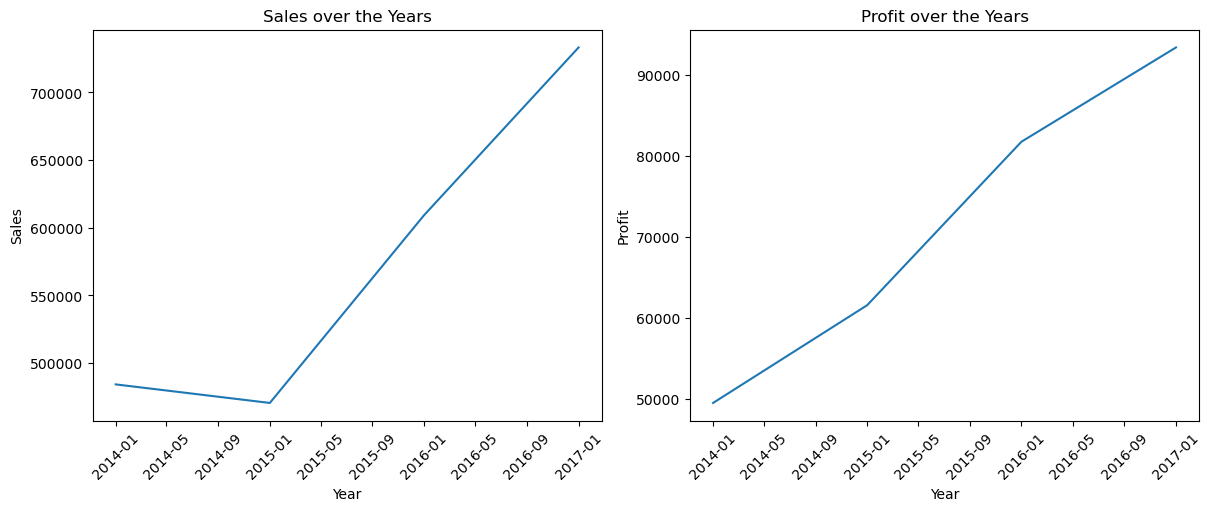

In [272]:
# Let's check Sales and Profits over the Years.
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.lineplot(data=df, x='Year', y='Sales', estimator = sum, ax=axs[0], ci=None)
sns.lineplot(data=df, x='Year', y='Profit', estimator = sum, ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Sales over the Years')
axs[1].title.set_text('Profit over the Years')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

**The overall trend is very positive, either in terms of Sales or in terms of Profits over the Years.**

### Analysis on Regions

In [31]:
# Volume of goods sold by Regions.
df['Region'].value_counts()

Region
West       3235
East       2762
Central    2371
South      1626
Name: count, dtype: int64

In [207]:
# Let's explore more in detail each Region and some aggregate functions

df.groupby('Region').agg({'Sales': ['min', 'max', 'mean', 'count', 'sum'], 
                          'Profit':['min', 'max', 'mean', 'count', 'sum'] })

Sales                                          Profit           \
          min       max        mean count        sum      min      max   
Region                                                                   
Central  0.84  10499.97  218.810654  2371  518800.06 -1862.31  5039.99   
East     0.56  13999.96  221.482448  2762  611734.52 -1665.05  6719.98   
South    0.98  22638.48  247.252189  1626  402032.06 -6599.98  3177.48   
West     0.44  17499.95  236.363039  3235  764634.43 -3399.98  8399.98   

                                    
              mean count       sum  
Region                              
Central  26.828199  2371  63609.66  
East     34.252075  2762  94604.23  
South    18.558137  1626  30175.53  
West     30.296250  3235  98008.37

<Figure size 1000x800 with 0 Axes>

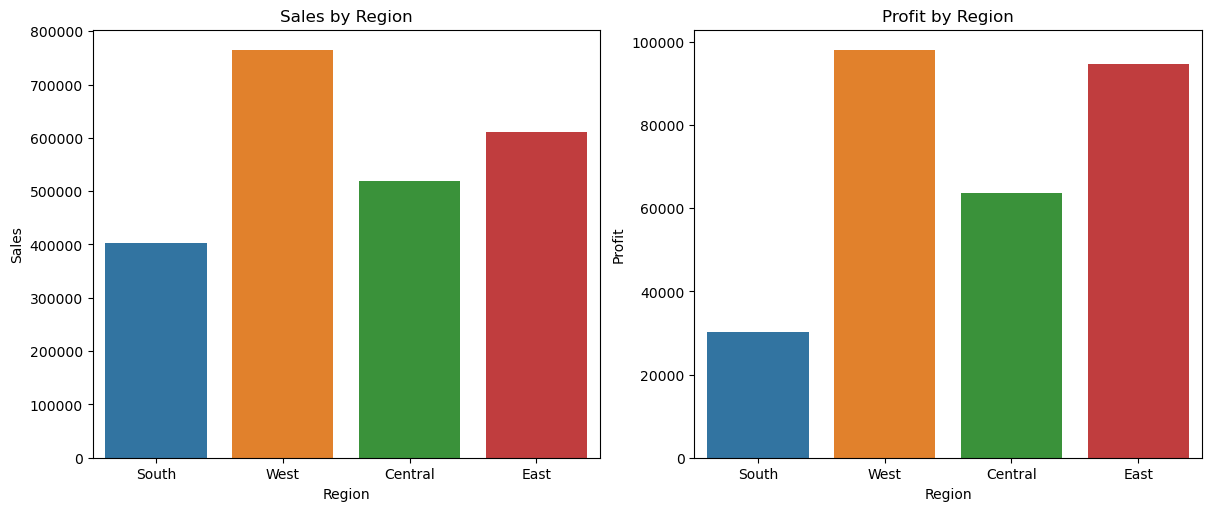

In [283]:
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.barplot(data=df, x='Region', y='Sales', estimator = sum, ax=axs[0], ci=None)
sns.barplot(data=df, x='Region', y='Profit', estimator = sum, ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Sales by Region')
axs[1].title.set_text('Profit by Region')

plt.show()

**These results are the compound of the performance over the years, it gives us a general trend for each Region.**

- The **Region with the most sales is the West**, reaching **almost USD 800.000 in Revenues**, followed by the East, Central and South.


- In terms of profit, we see the same results, **the most profitable Region is the West**, followed by the East, which is very close in term of profitability although there's a difference of ~ USD 150.000 less in Revenues compared to the West. Than we have Central, and South Regions.

<Figure size 1200x600 with 0 Axes>

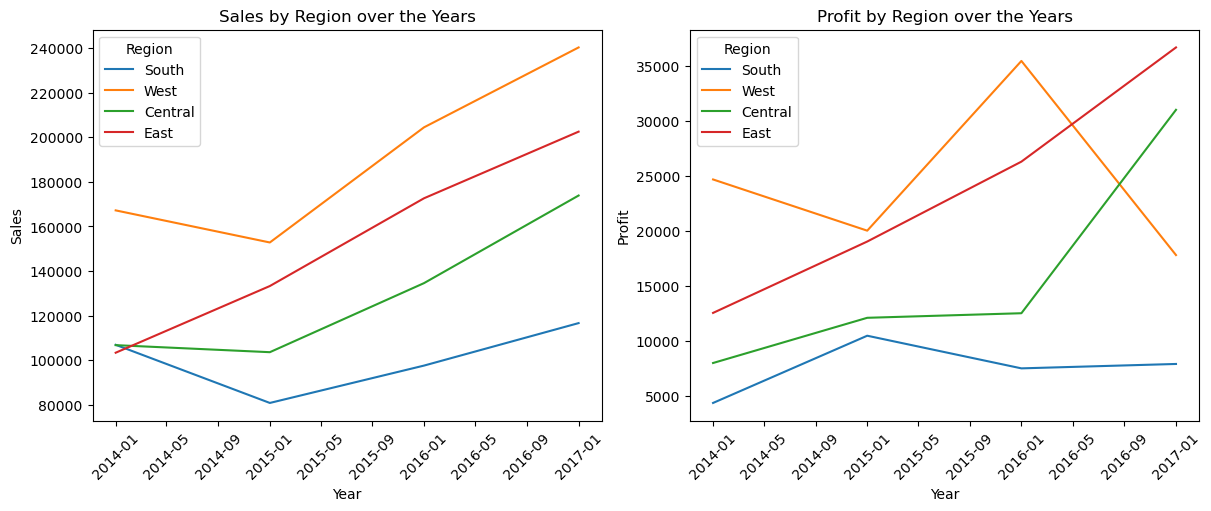

In [269]:
# Exploring Sales and Profit of Regions over the Years
plt.figure(figsize = (12,6))

fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True)

#Visualization plots
sns.lineplot(data = df, x = 'Year', y = 'Sales', hue = 'Region', ax=axs[0], estimator= sum, ci=None)
sns.lineplot(data = df, x = 'Year', y = 'Profit', hue = 'Region', ax=axs[1], estimator= sum, ci=None)

#Set titles
axs[0].title.set_text('Sales by Region over the Years')
axs[1].title.set_text('Profit by Region over the Years')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

In these plots we want to explore 'Sales' and 'Profit' over the Years based on Regions.

In the first plot, we are concerned about Sales:

- From 2014 to 2015, all the Regions decreased in Sales, but East.
- From 2015 to 2017, all the Regions increased in Sales. 
- The Overall growth is positive.

If we observe the profit by Region, we see:

- From 2014 to 2015, all the Regions increased in Profit, but West.
- From 2015 to 2016, South decreased in profit, Central remained constant, while East and West accelerated their Profit.
- From 2016 to 2017, the South remained constant, the West has fallen, while East and Central have grown dramatically.

### States and Cities Analysis

In [28]:
# N. of States in the Dataset
len(df['State'].unique())

41

In [303]:
#Let's create a subset showing for each states the revenue over the years

state = df.groupby('State', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
state.head()

,State,Sales
3,California,451036.62
27,New York,279549.92
36,Texas,192758.22
32,Pennsylvania,142838.59
39,Washington,133177.23


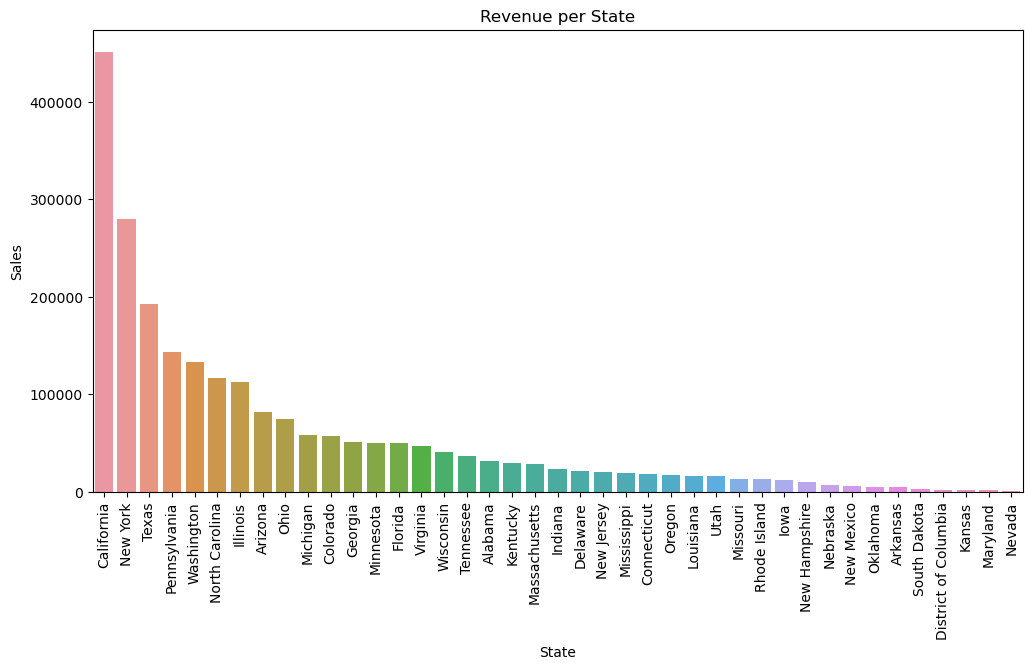

In [304]:
#Let's visualize the states and the revenue they have generated over the years.
plt.figure(figsize = (12,6))

#sns.histplot(data = df.sort_values('Sales', ascending=False), x = 'State', y = 'Sales', element = 'bars', stat = 'count')
sns.barplot(data = state, x = 'State', y= 'Sales', ci=None)

plt.title('Revenue per State')
            
plt.xticks(rotation = 90)
plt.show()

In the Dataset there are **41 unique states.** 

- **Top 3 states by Sales** are: **California, New York and Texas.**
- **Worst 3 states by Sales** are: **Nevada, Maryland and Kansas.**

In [312]:
#Let's create a subset showing for each states the profit over the years

profit = df.groupby('State', as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

#Top 5
print('Top 5 States by Profit:')
profit.head()

Top 5 States by Profit:


,State,Profit
3,California,59398.43
27,New York,58177.78
39,Washington,24405.74
36,Texas,20528.97
32,Pennsylvania,13604.91


In [313]:
#Worst 5
print('Worst 5 States by Profit:')
profit.tail()

Worst 5 States by Profit:


,State,Profit
23,Nevada,278.07
31,Oregon,234.07
13,Kansas,139.21
2,Arkansas,-62.97
28,North Carolina,-4236.65


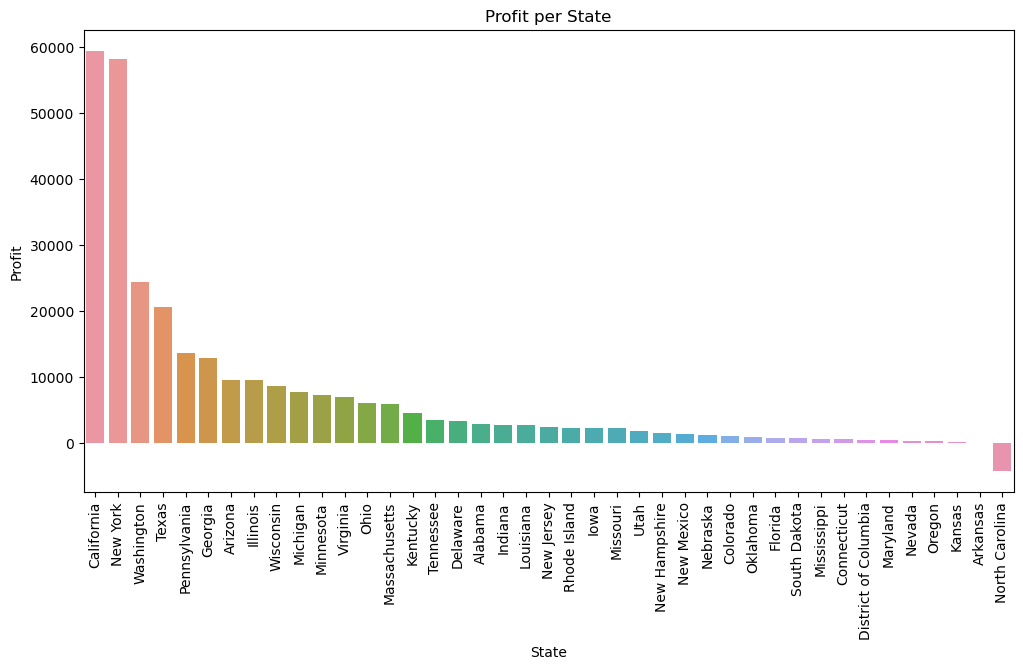

In [306]:
#Let's visualize the states and the profit they have generated over the years.
plt.figure(figsize = (12,6))

#sns.histplot(data = df.sort_values('Sales', ascending=False), x = 'State', y = 'Sales', element = 'bars', stat = 'count')
sns.barplot(data = profit, x = 'State', y= 'Profit', ci=None)

plt.title('Profit per State')
            
plt.xticks(rotation = 90)
plt.show()

**Top 3 States by Profit are:**

- California, with 59398.43 USD
- New York, with 58177.78 USD
- Washington, with 24405.74 USD

**Worst 3 States by Profit are:**

- North Carolina, with a negative -4236.65 USD
- Arkansas, with a negative -62.97 USD
- Kansas, with 139.21 USD

In [25]:
# How many cities are in this dataset?
len(df['City'].unique())

252

In [320]:
#Creating a subset of all cities by sales

city_sales = df.groupby('City', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
city_sales.head()

,City,Sales
161,New York City,210927.06
129,Los Angeles,141770.79
183,Philadelphia,130921.18
217,Seattle,108638.21
212,San Francisco,107084.07


In [321]:
city_sales.tail()

,City,Sales
164,North Las Vegas,221.09
201,Round Rock,146.94
235,Tulsa,132.74
122,Lehi,88.47
138,Mcallen,47.95


**Top 3 Cities by Sales are:**

- New York City, with 210927.06 USD
- Los Angeles, with 141770.79 USD
- Philadelphia, with 130921.18 USD

**Worst 3 Cities by Sales are:**

- Mcallen, with a negative 47.95 USD
- Lehi, with a negative 88.47 USD
- Tulsa, with 132.74 USD

<Figure size 1000x800 with 0 Axes>

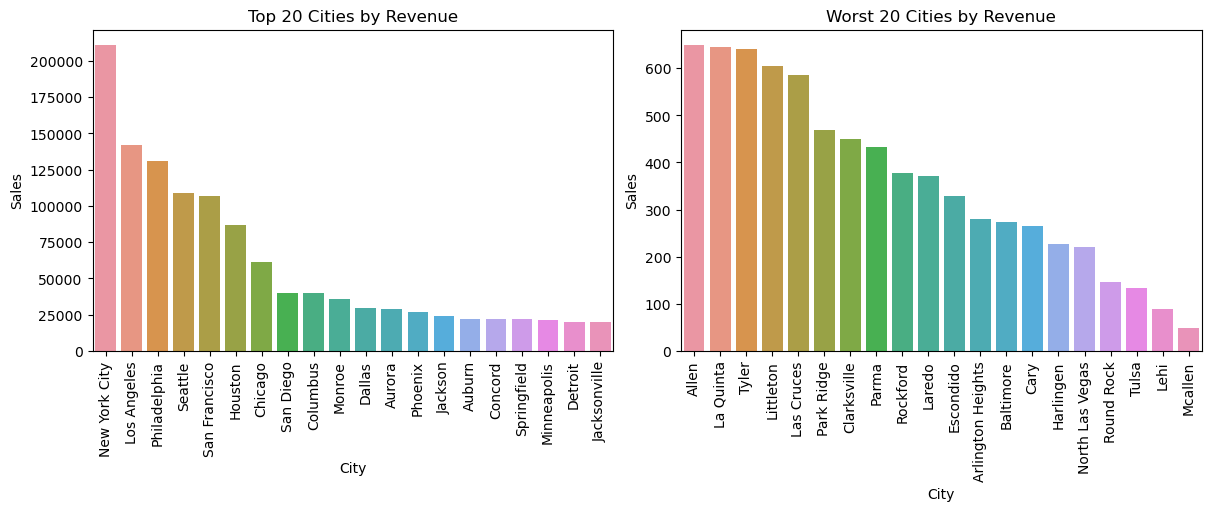

In [330]:
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.barplot(data=city_sales.head(20), x='City', y='Sales', estimator = sum, ax=axs[0], ci=None)
sns.barplot(data=city_sales.tail(20), x='City', y='Sales', estimator = sum, ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Top 20 Cities by Revenue')
axs[1].title.set_text('Worst 20 Cities by Revenue')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.show()

In [322]:
#Creating a subset of all cities by profit
city_profit = df.groupby('City', as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

city_profit.head()

,City,Profit
161,New York City,41892.82
217,Seattle,19979.85
212,San Francisco,17141.82
95,Houston,13279.58
183,Philadelphia,12376.61


In [702]:
city_profit.tail()

,City,Profit
130,Louisville,-1428.23
69,Florence,-1441.64
25,Burlington,-2344.83
144,Miami,-3583.97
229,Thomasville,-6626.37


**Top 3 Cities by Profit are:**

- New York City, with 41892.82 USD
- Seattle, with 19979.85 USD
- San Francisco, with 17141.82 USD

**Worst 3 Cities by Profit are:**

- Thomasville, with a negative -6626.37 USD
- Miami, with a negative -3583.97 USD
- Burlington, with -2344.83 USD

<Figure size 1000x800 with 0 Axes>

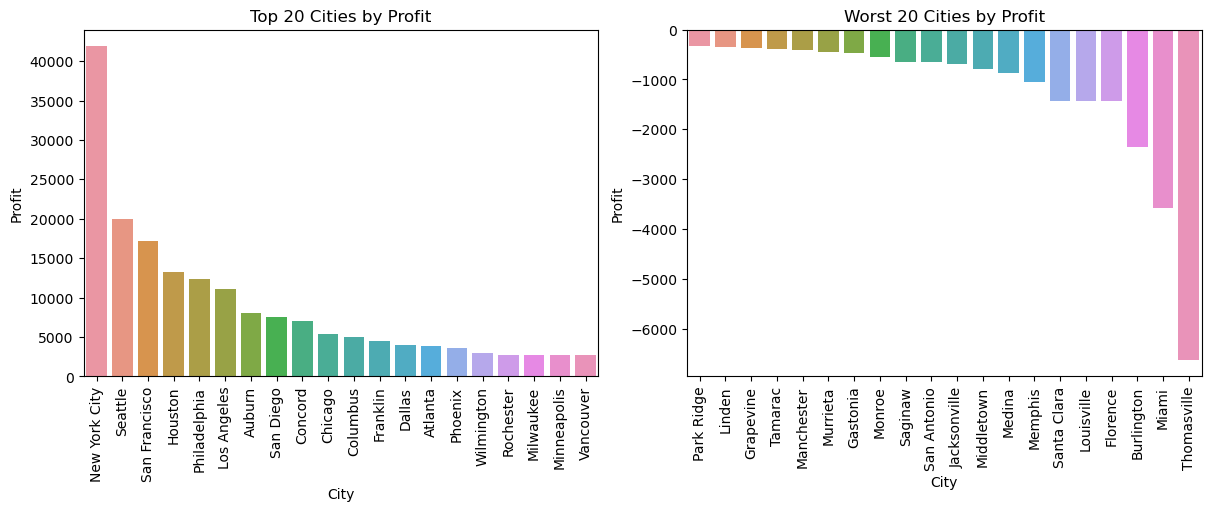

In [331]:
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.barplot(data=city_profit.head(20), x='City', y='Profit', estimator = sum, ax=axs[0], ci=None)
sns.barplot(data=city_profit.tail(20), x='City', y='Profit', estimator = sum, ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Top 20 Cities by Profit')
axs[1].title.set_text('Worst 20 Cities by Profit')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.show()

### Customers Analysis

**Let's remember the age groups:**

- Gen Z: age 18-24
- Millennials: age 25-40
- Gen X: age 41-56
- Boomers: age 57-70

In [32]:
# Volume of purchased goods by Age Group
df['Age_groups'].value_counts()

Age_groups
boomers        3008
millennials    2837
gen_x          2782
gen_z          1367
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

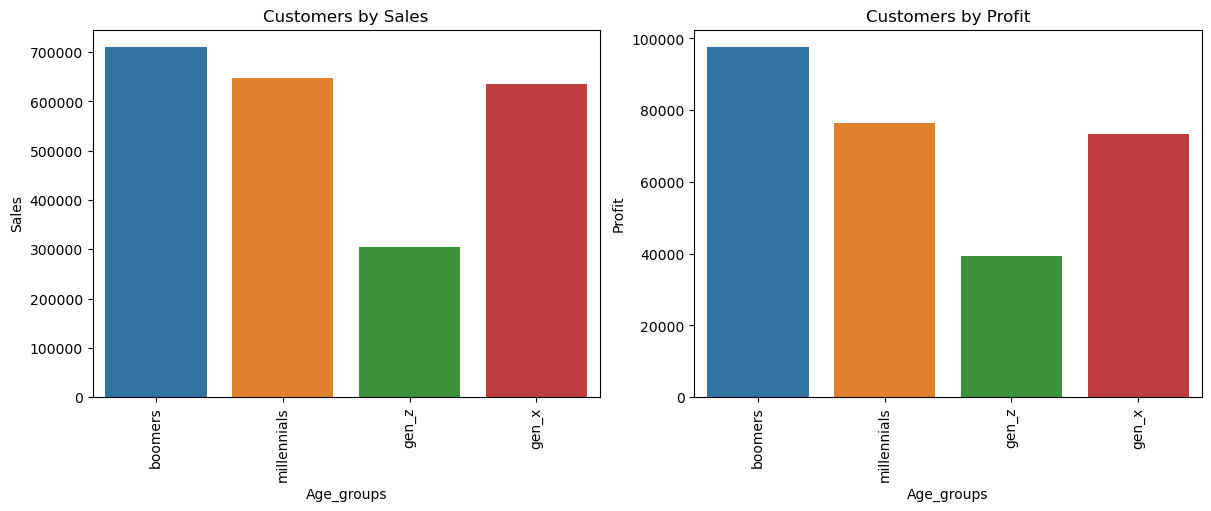

In [337]:
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.barplot(data=df, x='Age_groups', y='Sales', estimator = sum, ax=axs[0], ci=None)
sns.barplot(data=df, x='Age_groups', y='Profit', estimator = sum, ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Customers by Sales')
axs[1].title.set_text('Customers by Profit')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.show()

**It seems that Boomers are the best buyers in terms of Sales and Profitability, followed by Millennials, Gen X, and Gen Z. So the age of the customers spans from 25 to 70, with the best customers being the ones belonging to the age from 57 to 70.**

In [349]:
# How much customers based on group, spend on average.
customers = df.groupby('Age_groups', as_index = False).agg({'Sales': ['min', 'max', 'mean', 'median', 'count', 'sum'], 
                          'Profit':['min', 'max', 'mean', 'median', 'count', 'sum'] })
customers

Age_groups Sales                                                  Profit  \
                 min       max        mean  median count        sum      min   
0      boomers  0.44  22638.48  236.110213  53.190  3008  710219.52 -1850.95   
1        gen_x  0.56   8187.65  228.340636  58.285  2782  635243.65 -6599.98   
2        gen_z  1.08  11199.97  222.740059  49.570  1367  304485.66 -3839.99   
3  millennials  0.84  17499.95  228.146718  53.420  2837  647252.24 -3701.89   

                                              
       max       mean median count       sum  
0  6719.98  32.433700  8.655  3008  97560.57  
1  2504.22  26.327646  9.330  2782  73243.51  
2  3919.99  28.684711  7.990  1367  39212.00  
3  8399.98  26.923409  8.400  2837  76381.71

Boomers and Millennials are more inclined to buy high ticket items, resulting in the data a large number of outliers. 

Due to the number of outliers, we can't extract much information from the mean. But we can analyze these numbers through the median, which in this case is much more relevant to understand the 'Average Order Value' of a typical purchase.

<Figure size 1000x800 with 0 Axes>

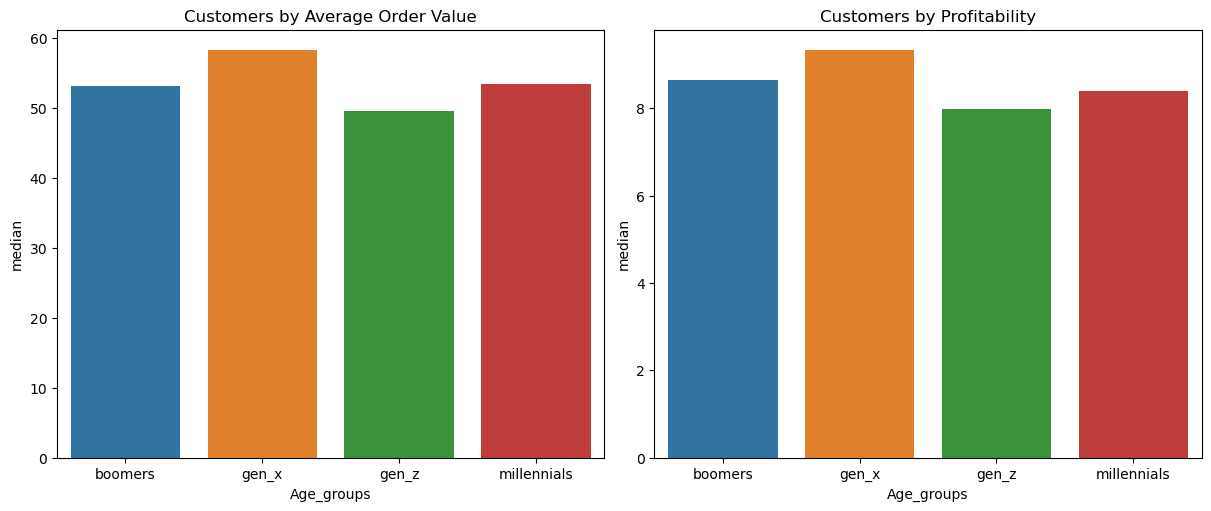

In [359]:
# Configuring the plot size
plt.figure(figsize = (10,8))

# Set two plots, one next to the other
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True) 

# Creating the plots
sns.barplot(data=customers, x='Age_groups', y=customers['Sales']['median'], ax=axs[0], ci=None)
sns.barplot(data=customers, x='Age_groups', y=customers['Profit']['median'], ax=axs[1], ci=None)

# Set the titles
#sns.set(font_scale= -6)
axs[0].title.set_text('Customers by Average Order Value')
axs[1].title.set_text('Customers by Profitability')

# Rotation of the x axes
#for ax in axs.flatten():
   # plt.sca(ax)
    #plt.xticks(rotation = 90)

plt.show()

- Gen X customers tend to have an Average Order Value higher than other types of customers (58 USD), resulting in buying items with a slightly higher profitability for the company (9 USD).

- Boomers and Millenials have an Average Order Value of around 53 USD, with a profitability of around 8.5 USD for the company.

- Gen Z have an Average Order Value of under 50 USD, with a profitability of less than 8 for the company.

<Figure size 1200x600 with 0 Axes>

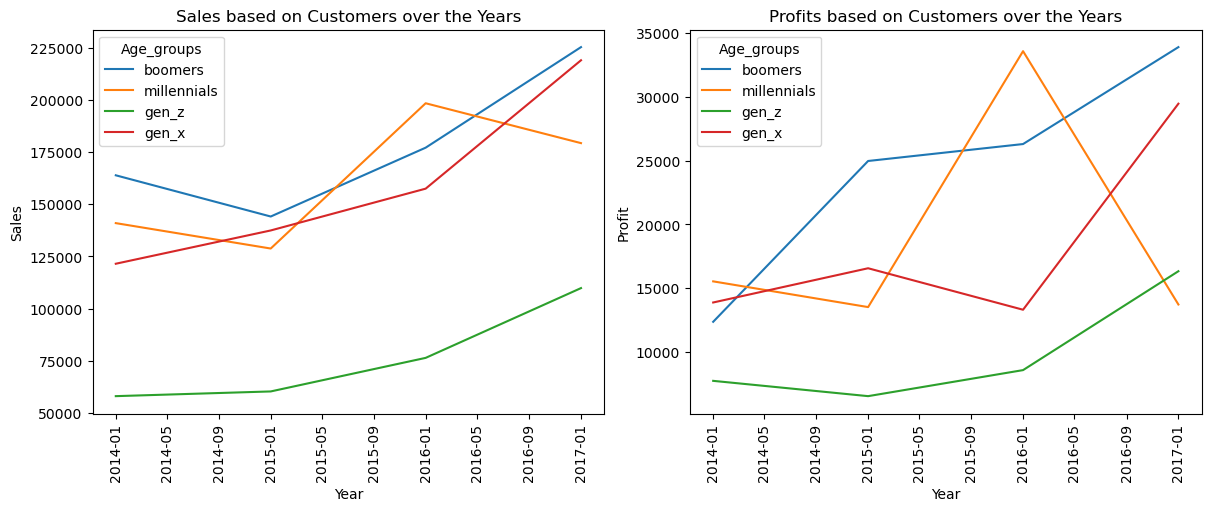

In [468]:
# Let's see Sales and Profits based on Customers Groups

# Set the plots
plt.figure(figsize = (12,6))

fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True)

#Visualization plots
sns.lineplot(data = df, x = 'Year', y = 'Sales', hue = 'Age_groups', ax=axs[0], estimator= sum, ci=None)
sns.lineplot(data = df, x = 'Year', y = 'Profit', hue = 'Age_groups', ax=axs[1], estimator= sum, ci=None)

#Set titles
axs[0].title.set_text('Sales based on Customers over the Years')
axs[1].title.set_text('Profits based on Customers over the Years')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.show()

The Overall trend for Sales based on Customers Groups seems to be constantly increasing over the years, a part for the Millennials that in the last year decreased in Sales.

The Profits based on Customers over the years seem to grow accordingly to the first graph, but we noticed that the profits coming from the Millennials fell dramatically.

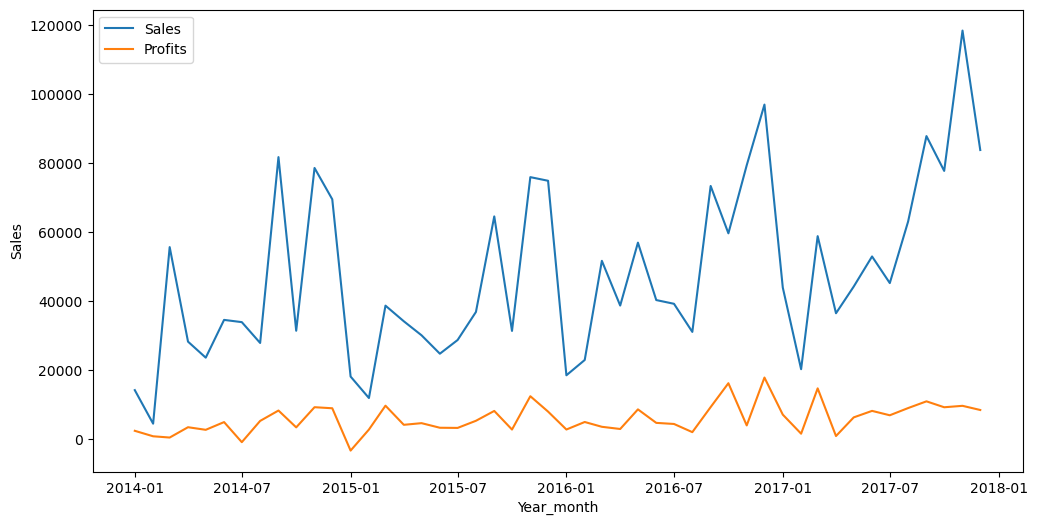

In [475]:
plt.figure(figsize = (12,6))

sns.lineplot(data = df, x = 'Year_month', y = 'Sales', estimator= sum, ci=None, label = 'Sales')
sns.lineplot(data = df, x = 'Year_month', y = 'Profit', estimator= sum, ci=None, label = 'Profits')

plt.show()


In this graph we are trying to understand a trend in sales over the months, and how profits behave in the periods. 

As we can see there's a strong increase in sales during the second part of the various years, particularly in Q4. 

Despite the recurring and increasing trend, we don't see that the profits trend is growing accordingly, but it remains stable, increasing during Q4 of the various years, but not increasing in the overall trend.

In [481]:
quarter = df.groupby('Quarter', as_index = False).agg({'Sales': ['sum'], 'Profit':['sum'] })
quarter

,Quarter,Sales,Profit
,,sum,sum
0,1,359681.64,48023.74
1,2,445509.71,55284.80
2,3,613932.06,72467.32
3,4,878077.66,110621.93


<Figure size 1200x600 with 0 Axes>

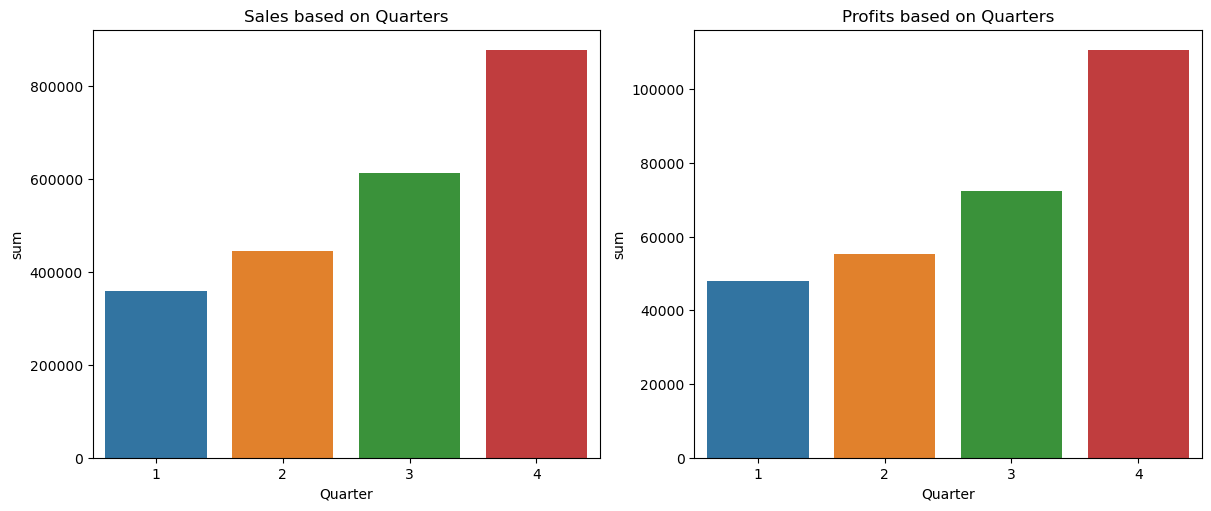

In [485]:
# Demonstrating that in the second part of the year, sales are increasing.

# Set the plots
plt.figure(figsize = (12,6))

fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True)

#Visualization plots
sns.barplot(data = quarter, x = 'Quarter', y = quarter['Sales']['sum'], ax=axs[0], ci=None)
sns.barplot(data = quarter, x = 'Quarter', y = quarter['Profit']['sum'], ax=axs[1], ci=None)

#Set titles
axs[0].title.set_text('Sales based on Quarters')
axs[1].title.set_text('Profits based on Quarters')

plt.show()

**In these graphs is easy to see how Sales and Profits increase during Q3, and particularly in Q4.**

### Product Analysis

In [498]:
df.head()
print(df.columns)

Index(['CustomerID', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'First_Name', 'Last_Name', 'Age_groups', 'OrderLine', 'OrderID',
       'OrderDate', 'ShipDate', 'ShipMode', 'ProductID', 'Category',
       'SubCategory', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Quarter', 'First_name', 'Year', 'Year_month'],
      dtype='object')


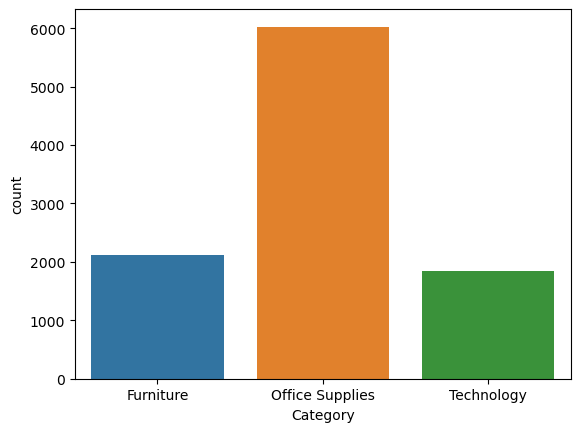

In [505]:
#Showing most sold items in term of volume.
sns.countplot(data = df, x = 'Category')
plt.show()

From this graph we clearly see that **the most sold item in term of volume is the category 'Office Supplies Category'**, then 'Furniture', and 'Tecnology'.

<Figure size 1200x600 with 0 Axes>

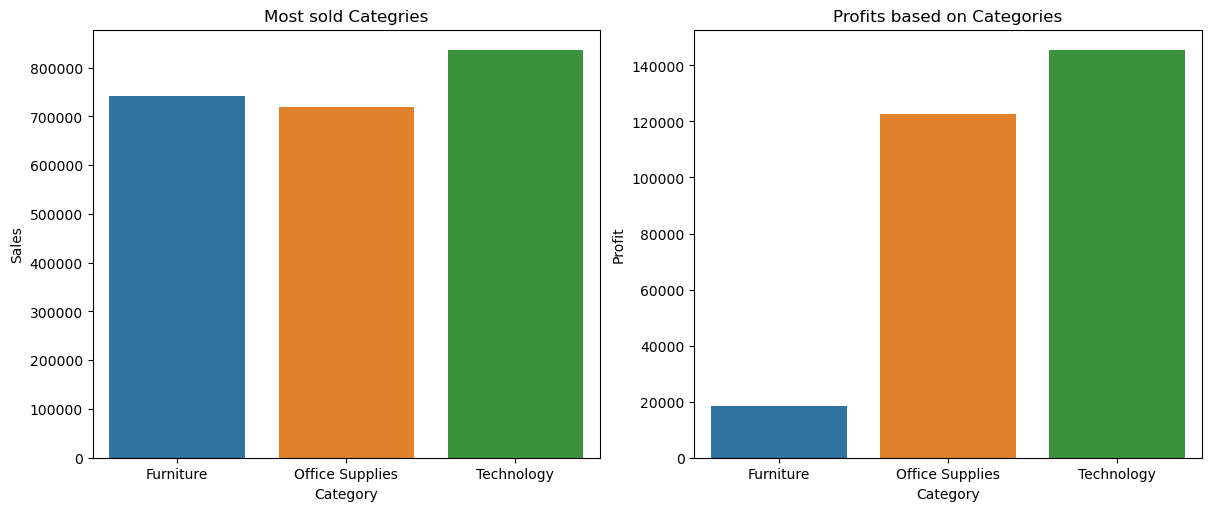

In [500]:
# Let's see the most sold Category in terms of Revenue and Profit

# Set the plots
plt.figure(figsize = (12,6))

fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True)

#Visualization plots
sns.barplot(data = df, x = 'Category', y = 'Sales', ax=axs[0], ci=None, estimator= sum)
sns.barplot(data = df, x = 'Category', y = 'Profit', ax=axs[1], ci=None, estimator= sum)

#Set titles
axs[0].title.set_text('Most sold Categries')
axs[1].title.set_text('Profits based on Categories')

plt.show()

In [501]:
# Some numeric observations about Categories.
df.groupby('Category', as_index = False).agg({'Sales': ['min', 'max', 'mean', 'median', 'count', 'sum'], 
                          'Profit':['min', 'max', 'mean', 'median', 'count', 'sum'] })

Category Sales                                                 \
                     min       max        mean  median count        sum   
0        Furniture  1.89   4416.17  349.834974  182.22  2121  741999.98   
1  Office Supplies  0.44   9892.74  119.324094   27.42  6026  719046.99   
2       Technology  0.99  22638.48  452.709312  166.16  1847  836154.10   

    Profit                                               
       min      max       mean  median count        sum  
0 -1862.31  1013.13   8.699316   7.770  2121   18451.25  
1 -3701.89  4946.37  20.327063   6.885  6026  122490.88  
2 -6599.98  8399.98  78.752388  25.020  1847  145455.66

Although 'Office Supplies Category' has the most volume, being affordable and recurring items to buy, the best category in terms of Revenue is Technology, then Furniture, and Office Supplies.

Regarding Profits, the best category is Technology and Office Supplies. Furniture has a very low profitability compared to other categories.

<Figure size 1200x600 with 0 Axes>

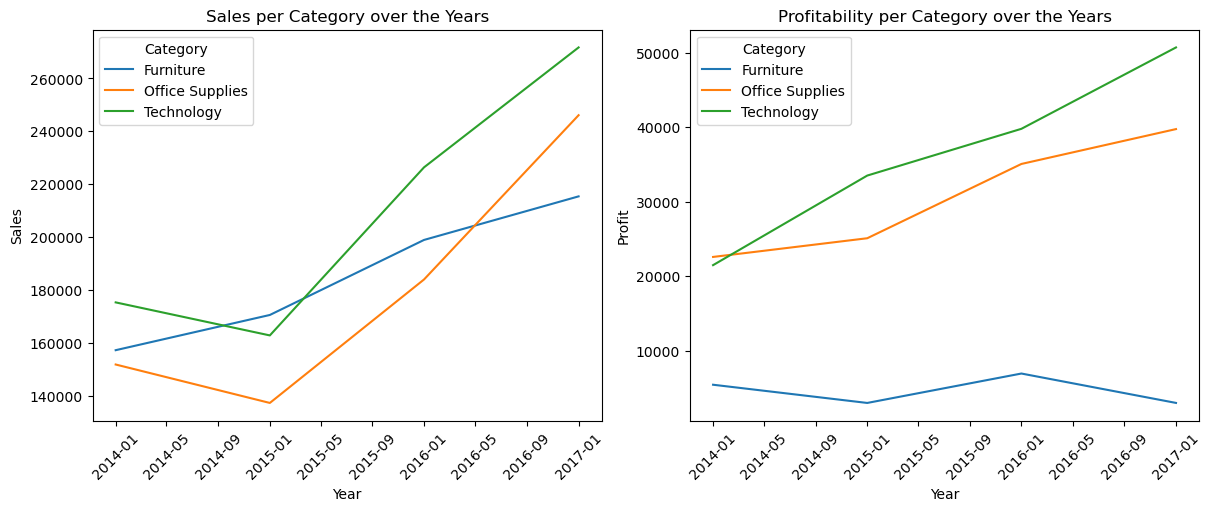

In [511]:
#Let's see the growth throughout the years of the various categories.

# Set the plots
plt.figure(figsize = (12,6))

fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True)

#Visualization plots
sns.lineplot(data = df, x = 'Year', y = 'Sales', hue = 'Category', ax=axs[0], ci=None, estimator= sum)
sns.lineplot(data = df, x = 'Year', y = 'Profit', hue = 'Category', ax=axs[1], ci=None, estimator= sum)

#Set titles
axs[0].title.set_text('Sales per Category over the Years')
axs[1].title.set_text('Profitability per Category over the Years')

# Rotation of the x axes
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

As we can see, in the first year, demand for Technology and Office Supplies decreased, but profits increased. Regarding Furniture, sales were stedly increasing, but profits dropped.

From 2015 to the end of 2016, sales soared esponencially for Office Supplies and Technology, bringing the majority of profits. Sales for Furniture incresed with less power, while for profit remained constant on the lower-end of the graph.

In [554]:
#How many Sub-Categories are there?

print('N. of Sub Categories: ',len(df['SubCategory'].unique()))

N. of Sub Categories:  17


In [566]:
# Bestsellers Sub-categories (Sales)

sub_sales = df.groupby(['Category', 'Age_groups' ,'SubCategory'],  as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
sub_sales.head()

,Category,Age_groups,SubCategory,Sales
1,Furniture,boomers,Chairs,112843.93
55,Technology,boomers,Phones,101799.14
59,Technology,gen_x,Phones,92707.26
67,Technology,millennials,Phones,89400.61
13,Furniture,millennials,Chairs,88171.93


In [564]:
# Most profitable Sub-Categories (Profit)
sub_profits = df.groupby(['Category','Age_groups' , 'SubCategory'],  as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

sub_profits.head()

,Category,Age_groups,SubCategory,Profit
53,Technology,boomers,Copiers,23486.77
65,Technology,millennials,Copiers,18095.81
55,Technology,boomers,Phones,14184.18
56,Technology,gen_x,Accessories,13724.56
59,Technology,gen_x,Phones,13216.75


<Figure size 600x1600 with 0 Axes>

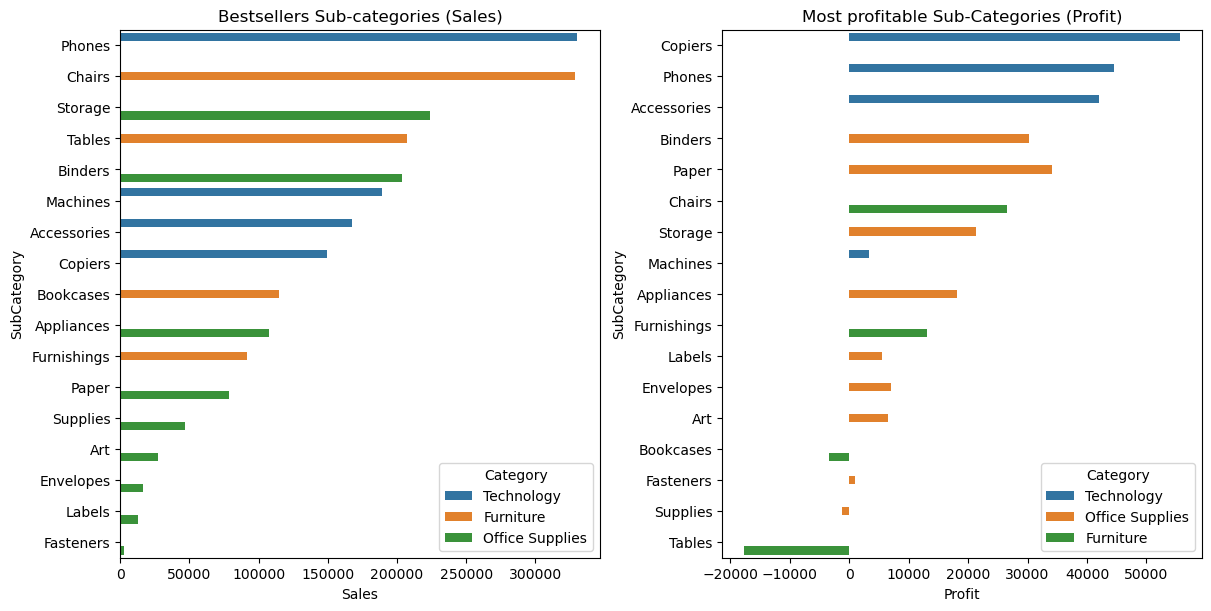

In [565]:
# Let's visualize the Sub-Categories in terms of Sales and Profits

# Set the plots
plt.figure(figsize = (6,16))

fig, axs = plt.subplots(ncols=2, figsize=(12,6), constrained_layout=True)

#Visualization plots
sns.barplot(data = sub_sales, x = 'Sales', y = 'SubCategory', hue = 'Category', ax=axs[0], ci=None, estimator= sum)
sns.barplot(data = sub_profits, x = 'Profit', y = 'SubCategory', hue = 'Category', ax=axs[1], ci=None, estimator= sum)

#Set titles
axs[0].title.set_text('Bestsellers Sub-categories (Sales)')
axs[1].title.set_text('Most profitable Sub-Categories (Profit)')

plt.show()

**Top 3 Sub-Categories** in terms of **Sales:**

- Phones
- Chairs
- Storage

**Worst 3  Sub-Categories** in terms of **Sales:**

- Fastners
- Labels
- Envelopes

**Top 3 Sub-Categories** in terms of **Profits:**

- Copiers
- Phones
- Accessories

**Worst 3  Sub-Categories** in terms of **Profits:**

- Tables
- Bookcases
- Supplies

### Sub-Category Analysis based on Customer Groups

**Let's remember the age groups:**

- Gen Z: age 18-24
- Millennials: age 25-40
- Gen X: age 41-56
- Boomers: age 57-70

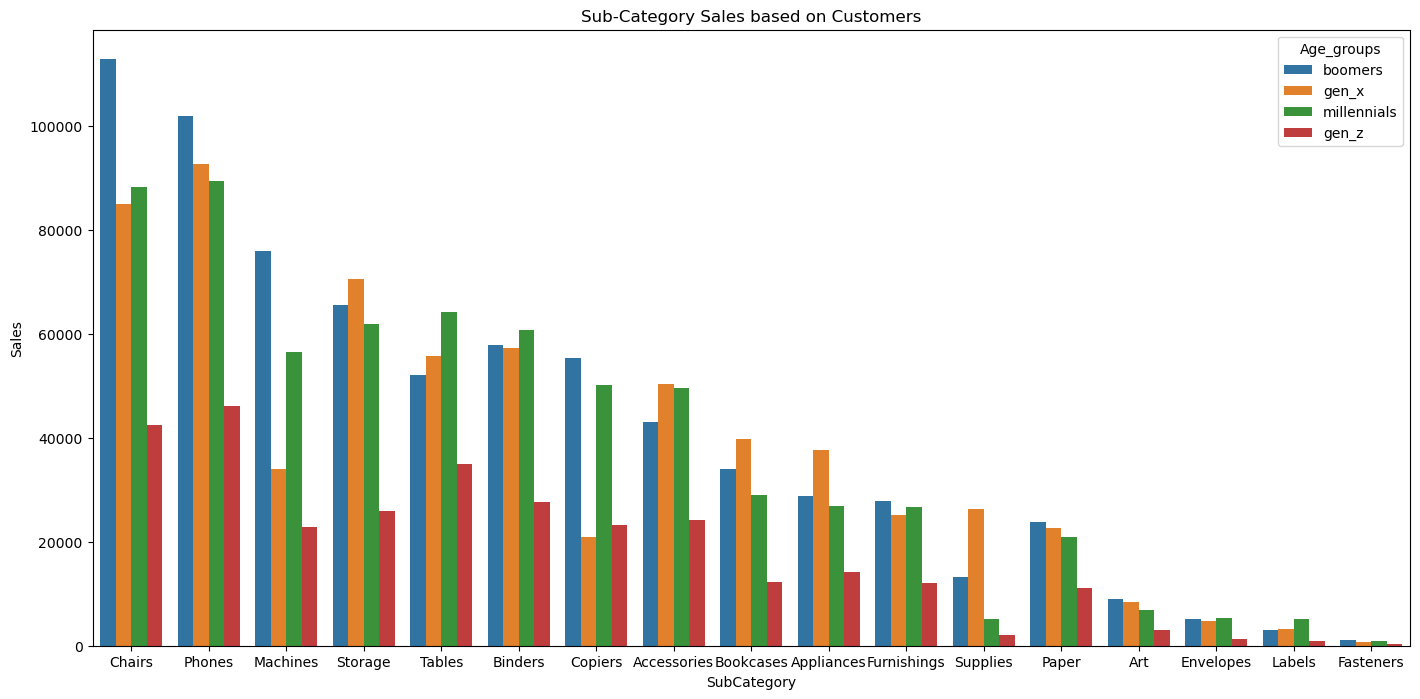

In [577]:
#Let's understand Sub-Category Sales based on Customers.

# Set the plots
plt.figure(figsize = (17, 8))

#Visualization plots
sns.barplot(data = sub_sales, y = 'Sales', x = 'SubCategory', hue = 'Age_groups', ci=None, estimator= sum)

#Set titles
plt.title('Sub-Category Sales based on Customers')

plt.show()

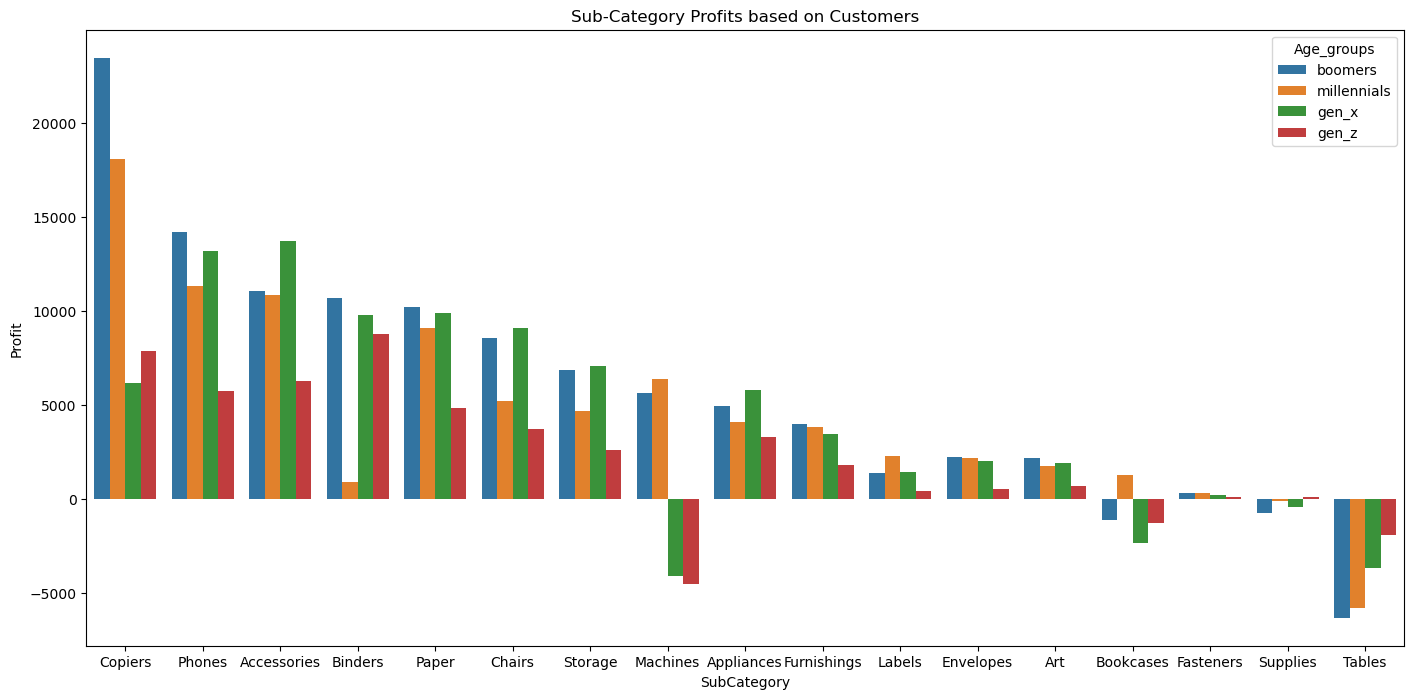

In [578]:
#Let's understand Sub-Category Profits based on Customers.

# Set the plots
plt.figure(figsize = (17, 8))

#Visualization plots
sns.barplot(data = sub_profits, y = 'Profit', x = 'SubCategory', hue = 'Age_groups', ci=None, estimator= sum)

#Set titles
plt.title('Sub-Category Profits based on Customers')

plt.show()

We can find useful information about the Sub-Category graphs based on Customers for marketing purposes. We know for sure which are the most profitable sub-categories and consequently the most profitable customers based on age.

### Discount Analysis

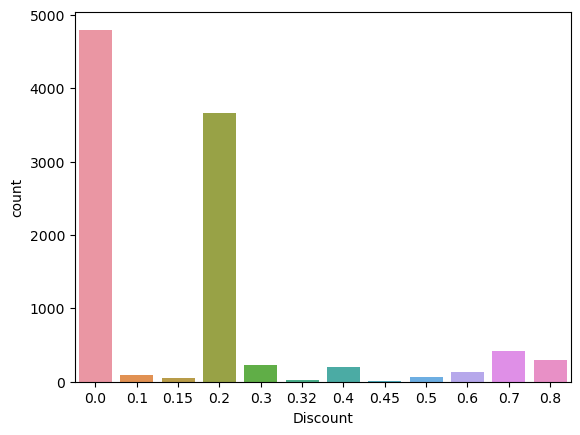

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64


In [655]:
# Let's investigate on the Discounts
sns.countplot(data = df, x = 'Discount')

plt.show()

print(df['Discount'].value_counts())

The majority of sales have been made without any Discount. Another big part of sales have been made applying 20% Discount.

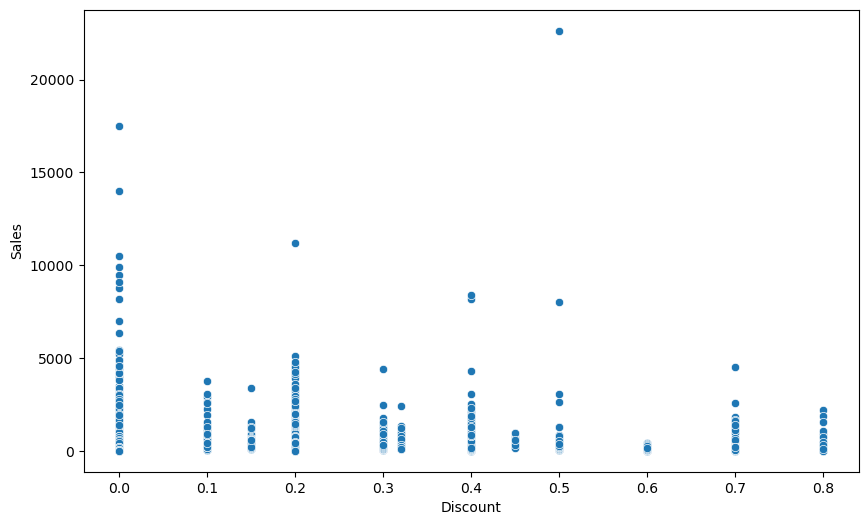

In [671]:
# Let's see the correlation between Discount and Sales.
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df, x = 'Discount', y = 'Sales')

plt.show()

There's no positive correlation: when Discounts increase, Sales decrease.

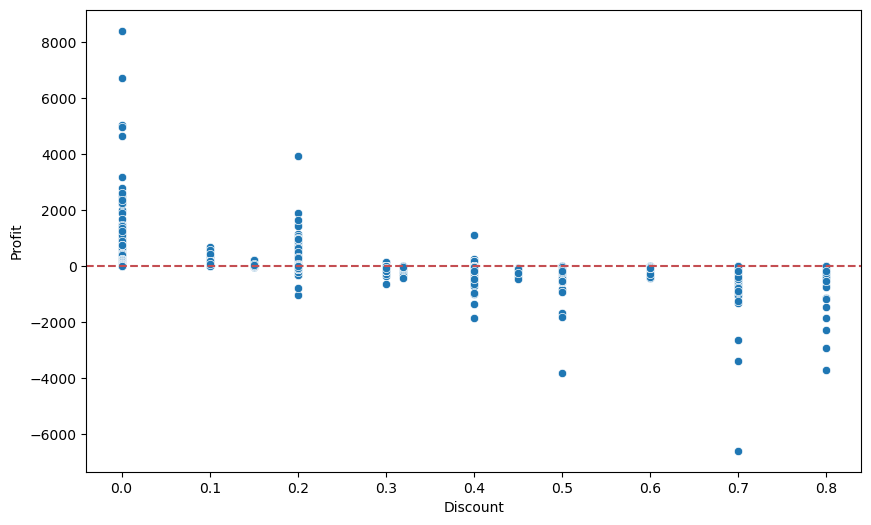

In [672]:
# Let's see the Discount related to Profitability

plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
plt.axhline(color = 'r', ls = '--')
plt.show()

This graph tells us that profitability drops when Discounts increase. We see some sales that are not profitable starting from 20%, although, in this discount range, the majority of sales are still profitable.

From the 30% Discount going on, there's no relevant profitability to track, as well as no relevant increase in sales.

**That's why 20% off is the limit for a good Discount rate, adding more discounts there are no benefits.**

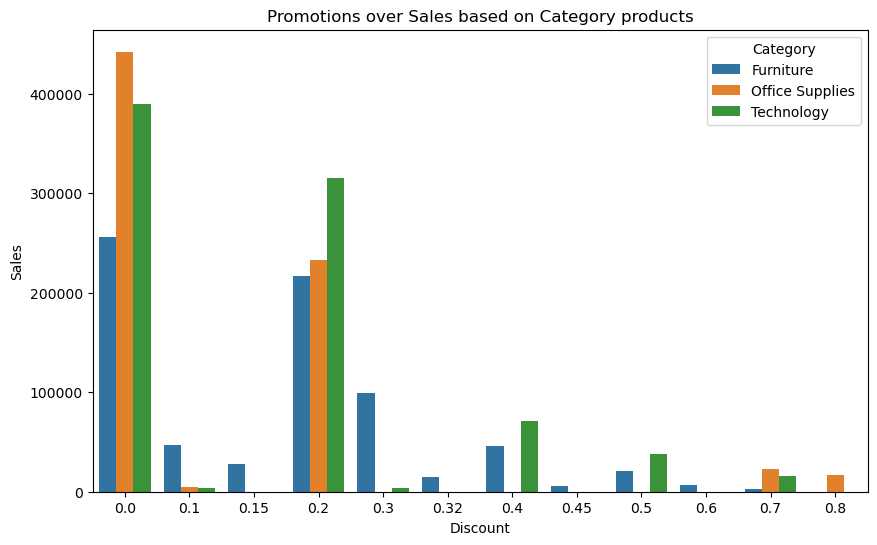

In [691]:
#Effects of Promotions over Sales based on Category products.

plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Discount', y = 'Sales', hue = 'Category', ci=None, estimator= sum)
plt.title('Promotions over Sales based on Category products')
plt.show()

Withouth applying any Discount, there are benefits over sales in all Categories.
When applying a 20% off, the most performing category is Technology, then Office Supplies, and Furniture.

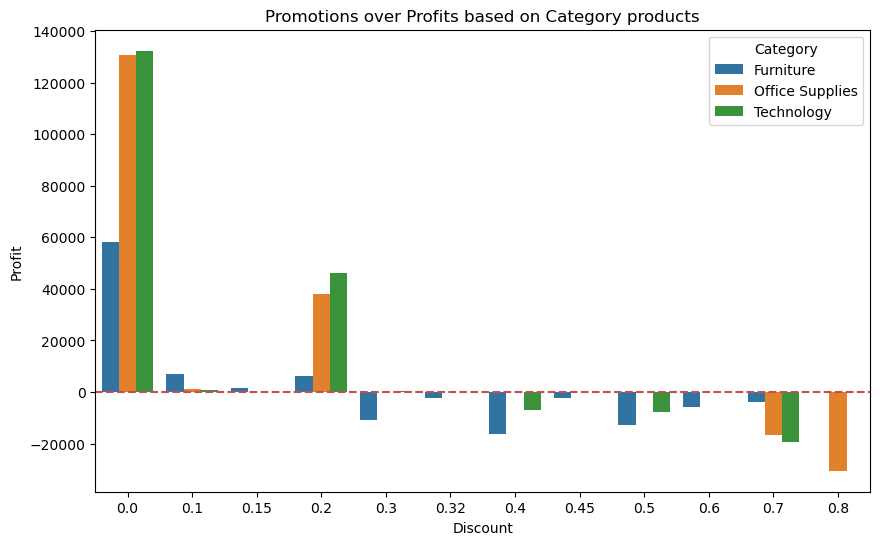

In [692]:
#Effects of Promotions over Profits based on Category products.

plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Discount', y = 'Profit', hue = 'Category', ci=None, estimator= sum)

plt.title('Promotions over Profits based on Category products')
plt.axhline(color = 'r', ls = '--')
plt.show()

An important part of Discounts is the possibility to increase sales while still making profits for the business sustainability.
Here, we can see that without any discounts, the profits are driven by Technology and Office Supplies, and for a lesser part by Furniture.

Applying a 20% Discount, the first two Categories are still profitable, but the last one is almost at break even.

# Conclusions


**Overall Company Health:**

- The company's overall health is good and sustainable.
- Over the past three years, there has been growth in both sales and profits, though profit growth has been slower.

**Sales Performance by Region:**

- West and East regions show strong sales.
- East is growing rapidly.
- Central region is performing well.
- South needs new business strategies for continued growth.

**Profit Performance by Region:**

- East and Central regions are performing very well in terms of profits.
- South is experiencing a slight decline in profits.
- West has seen a dramatic drop in profits, which needs investigation.

**State-Level Analysis:**

- All states are positively profitable except North Carolina.

**City-Level Analysis:**

- Out of 252 cities, 46 have negative profit, representing approximately 18% of the total.

**Customer Demographics:**

- Age 57-70 group spends the most.
- Age 41-56 group has shown growth over the years.
- Age 25-40 group has decreased in the last year.
- Age 18-24 group, though having little purchasing power in terms of high-ticket sales, remains profitable and growing.

**Product Performance:**

- Best-selling products in terms of volume: Office Supplies.
- Top products in terms of turnover and profits: Technology.
- Furniture category shows poor profits, with bookcases and tables having negative profits.

**Top Products by Sales and Profits:**

- Phones, copiers, and accessories in the technology category.
- Purchased mostly by Boomers (57-70 years) and Gen X (41-56 years).

**Discount Analysis:**

- Most sales were made without applying discounts.
- Increasing discount percentages do not correlate positively with an increase in sales.
- 25% discount is the break-even point; beyond this, the company sells products at a loss.